In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

LOADING RAW DATASETS AND TRANSFORMING INTO DATAFRAMES

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

CHECKING FOR DATA BY DISPLAYING FEW ROWS

In [3]:
print("Customers Data")
print(customers.head())

Customers Data
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [4]:
print("Products Data")
print(products.head())

Products Data
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [5]:
print("Transactions Data")
print(transactions.head())

Transactions Data
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


GETTING DATA INFORMATION

In [6]:
print("Customers Info")
print(customers.info())

Customers Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [7]:
print("Products Info")
print(products.info(), "\n")

Products Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 



In [8]:
print("Transactions Info")
print(transactions.info(), "\n")

Transactions Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None 



CHECKING FOR MISSING VALUES

In [9]:
print("Missing Values in Customers Dataset")
print(customers.isnull().sum(), "\n")
print("Missing Values in Products Dataset")
print(products.isnull().sum(), "\n")
print("Missing Values in Transactions Dataset")
print(transactions.isnull().sum(), "\n")

Missing Values in Customers Dataset
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products Dataset
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions Dataset
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



DATA CLEANING

CONVERTING DATETIME COLUMNS TO PROPER FORMAT

In [10]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

REMOVING DUPLICATES

In [11]:
customers.drop_duplicates(inplace=True)
print(customers.shape)

(200, 4)


In [12]:
products.drop_duplicates(inplace=True)
print(products.shape)

(100, 4)


In [13]:
transactions.drop_duplicates(inplace=True)
print(transactions.shape)

(1000, 7)


SUMMARY STATISTICS OF DATASETS

In [14]:
print("Summary Statistics for Customers Dataset")
print(customers.describe(),"\n")
print("Summary Statistics for Products Dataset")
print(products.describe(), "\n")
print("Summary Statistics for Transactions Dataset")
print(transactions.describe(), "\n")

Summary Statistics for Customers Dataset
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00 

Summary Statistics for Products Dataset
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000 

Summary Statistics for Transactions Dataset
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.

CUSTOMER DEMOGRAPHIC ANALYSIS

REGIONAL WISE CUSTOMER DISTRIBUTION

In [15]:
import warnings

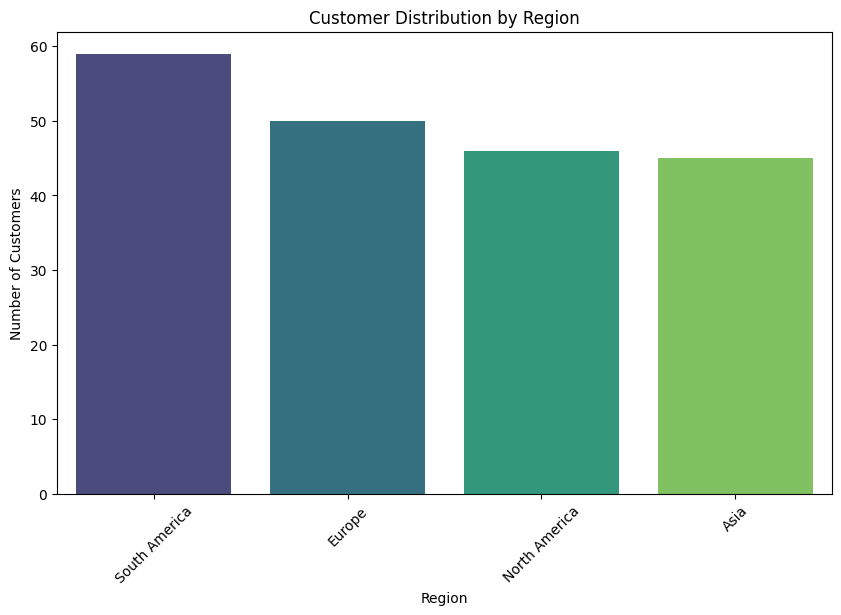

In [16]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index, palette="viridis")
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

SIGNUP TRENDS OVER TIME

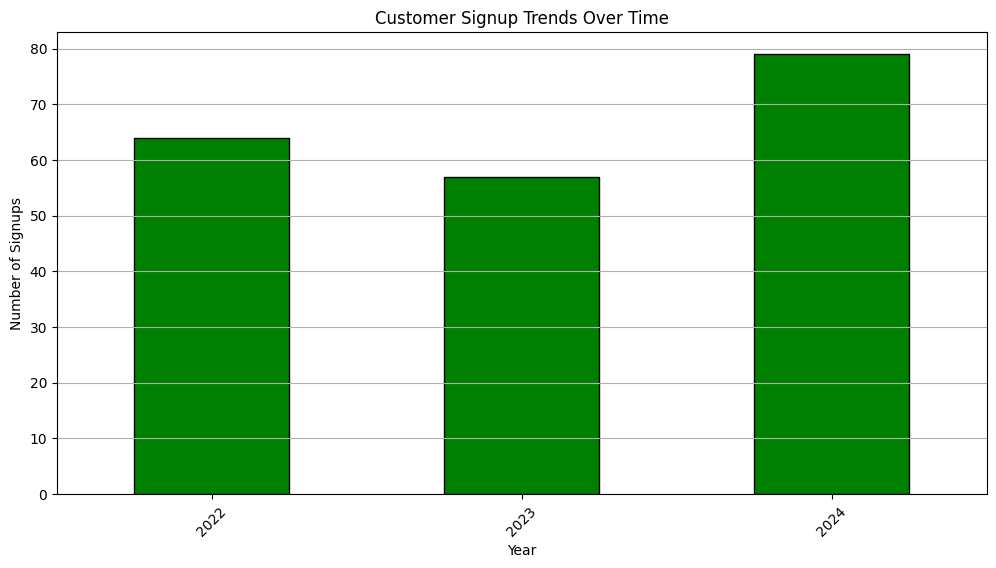

In [17]:
customers['Year'] = customers['SignupDate'].dt.year
signup_trends = customers['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='bar', color='Green', edgecolor='black')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Signups')
plt.grid(axis='y')
plt.show()

In [18]:
region_counts = customers['Region'].value_counts()
print("Customer Signup by Region:\n", region_counts,"\n")
print("Most Common SignUp Region:",customers['Region'].mode()[0])

Customer Signup by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64 

Most Common SignUp Region: South America


SIGNUP PERCENTAGE CALCULATION

In [19]:
region_percentage = (region_counts / region_counts.sum()) * 100
print("Customer Signup Percentage by Region:\n", region_percentage)

Customer Signup Percentage by Region:
 Region
South America    29.5
Europe           25.0
North America    23.0
Asia             22.5
Name: count, dtype: float64


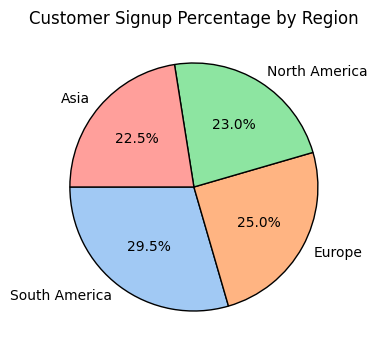

In [20]:
plt.figure(figsize=(4, 8))
region_percentage.plot.pie(autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'), wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Customer Signup Percentage by Region')
plt.ylabel('')
plt.show()

PRODUCT CATEGORY ANALYSIS

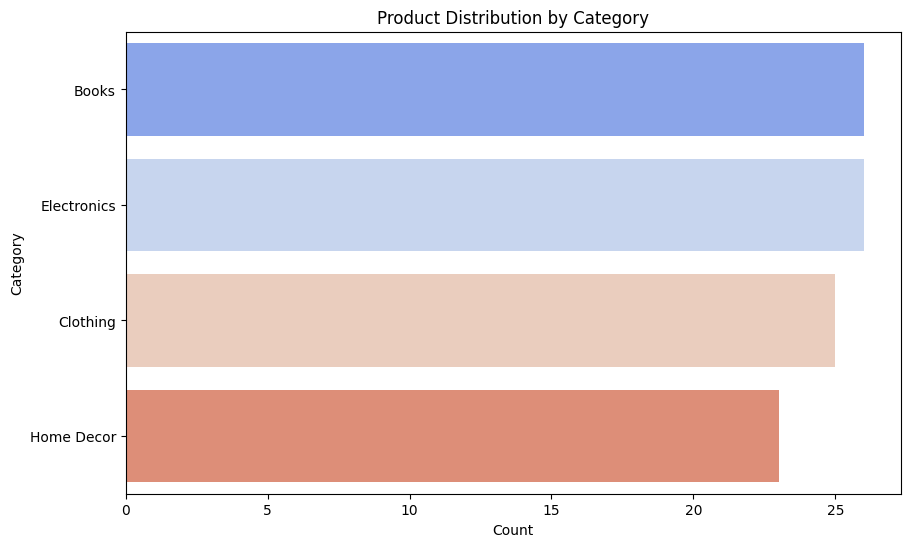

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=products, y='Category', order=products['Category'].value_counts().index, palette="coolwarm")
plt.title('Product Distribution by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

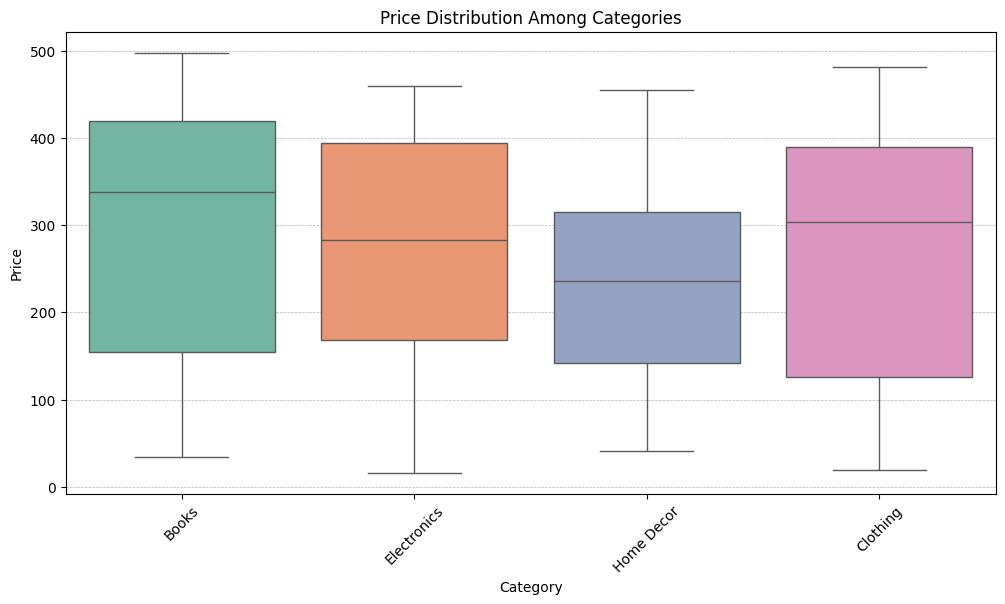

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=products, x='Category', y='Price', palette="Set2")
plt.title('Price Distribution Among Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

FINDING MOST POPULAR CATEGORY AND PRODUCT

In [23]:
merged_data = transactions.merge(products, on='ProductID')
popular_product = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).reset_index()
print(popular_product.head())
most_popular_product_name = popular_product.iloc[0]['ProductName']
most_popular_product_quantity = popular_product.iloc[0]['Quantity']

             ProductName  Quantity
0  ActiveWear Smartwatch       100
1   SoundWave Headphones        97
2    HomeSense Desk Lamp        81
3         ActiveWear Rug        79
4     SoundWave Cookbook        78


In [24]:
print(f"The most popular product is '{most_popular_product_name}' with {most_popular_product_quantity} units sold.")

The most popular product is 'ActiveWear Smartwatch' with 100 units sold.


In [25]:
popular_category = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False).reset_index()
most_popular_category_name = popular_category.iloc[0]['Category']
most_popular_category_quantity = popular_category.iloc[0]['Quantity']

In [26]:
print(f"The most popular category is '{most_popular_category_name}' with {most_popular_category_quantity} units sold.")

The most popular category is 'Books' with 681 units sold.


TIME BASED TRENDS (daily, weekly, monthly transactions)

In [27]:
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')  
transactions['Week'] = transactions['TransactionDate'].dt.isocalendar().week  
transactions['Day'] = transactions['TransactionDate'].dt.date 

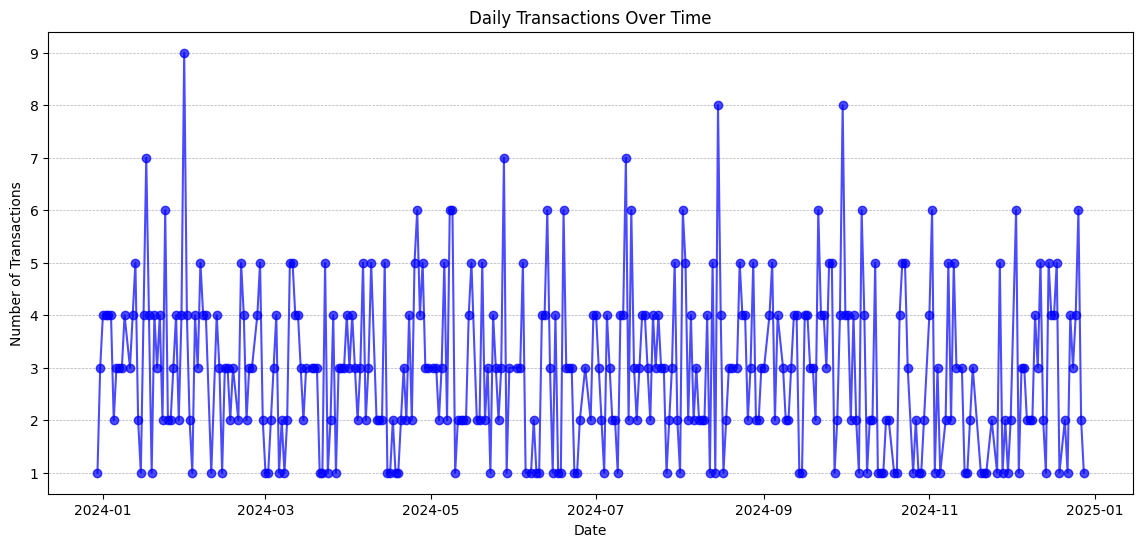

In [28]:
daily_trends = transactions.groupby('Day')['TransactionID'].count()
plt.figure(figsize=(14, 6))
daily_trends.plot(kind='line', marker='o', color='blue', alpha=0.7)
plt.title('Daily Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

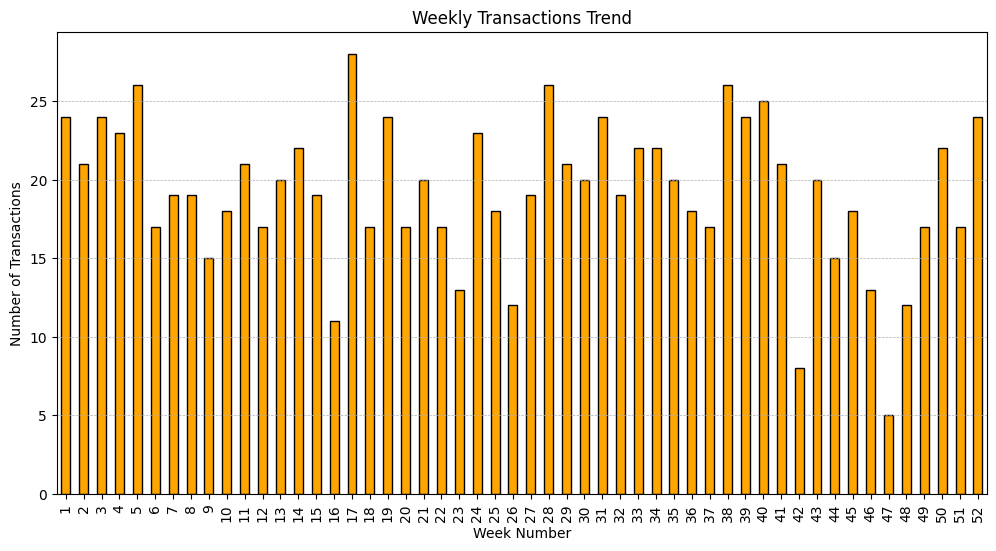

In [29]:
weekly_trends = transactions.groupby('Week')['TransactionID'].count()

plt.figure(figsize=(12, 6))
weekly_trends.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Weekly Transactions Trend')
plt.xlabel('Week Number')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

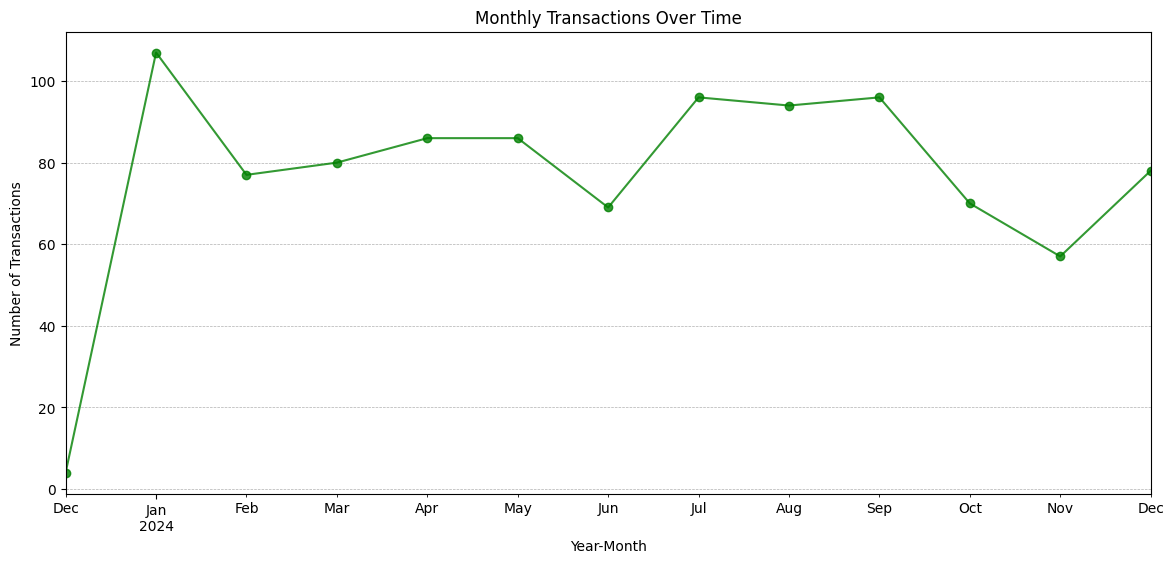

In [30]:
monthly_trends = transactions.groupby('YearMonth')['TransactionID'].count()

plt.figure(figsize=(14, 6))
monthly_trends.plot(kind='line', marker='o', color='green', alpha=0.8)
plt.title('Monthly Transactions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

TOP 10 PRODUCTS

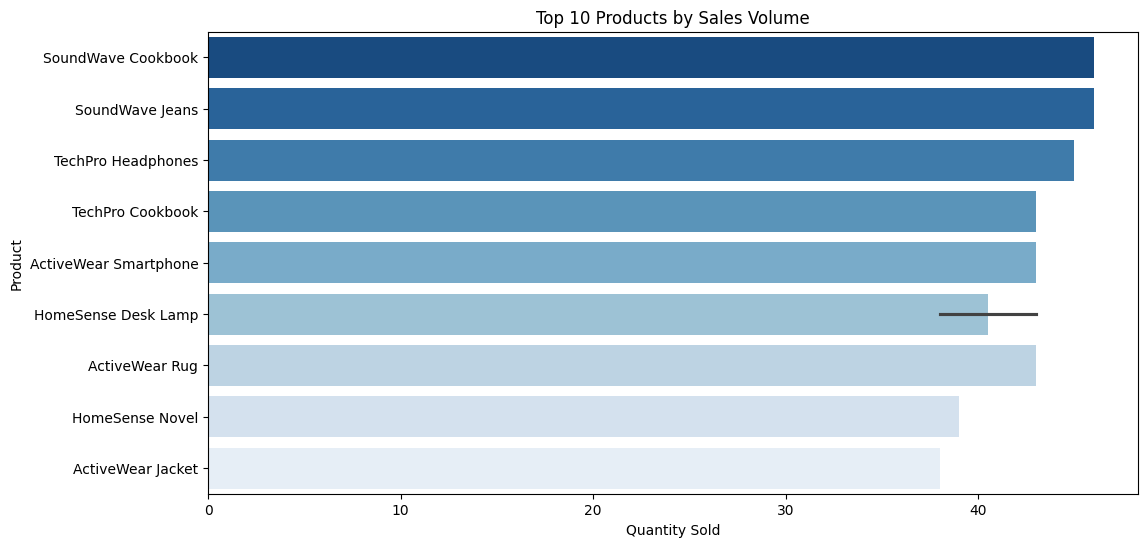

In [31]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index().merge(products, on='ProductID')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Quantity', y='ProductName', palette="Blues_r")
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

TOP 10 CUSTOMERS

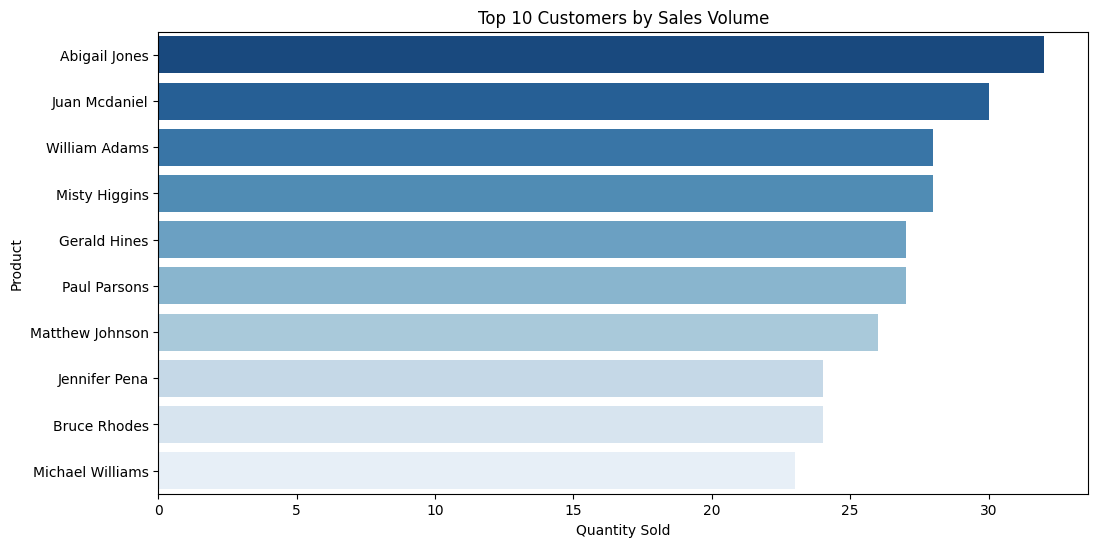

In [32]:
top_customers = transactions.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_customers = top_customers.reset_index().merge(customers, on='CustomerID')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='Quantity', y='CustomerName', palette="Blues_r")
plt.title('Top 10 Customers by Sales Volume')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

TOP 10 CUSTOMERS BY SALES PRICE

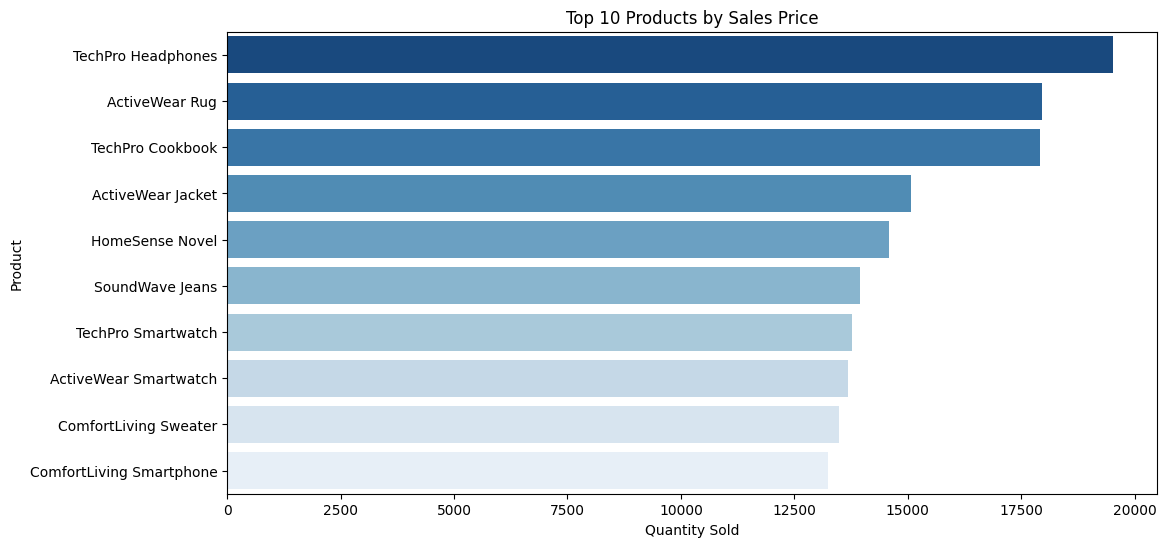

In [33]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index().merge(products, on='ProductID')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette="Blues_r")
plt.title('Top 10 Products by Sales Price')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

TOP 10 PRODUCTS BY SALES PRICE

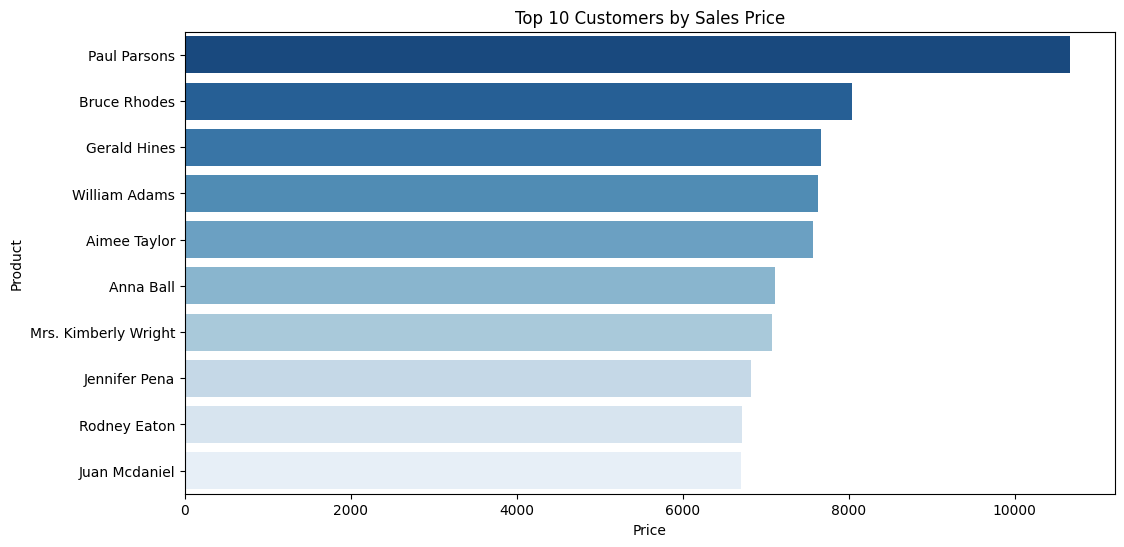

In [34]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers = top_customers.reset_index().merge(customers, on='CustomerID')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='TotalValue', y='CustomerName', palette="Blues_r")
plt.title('Top 10 Customers by Sales Price')
plt.xlabel('Price')
plt.ylabel('Product')
plt.show()

HIGH VALUE TRANSACTIONS

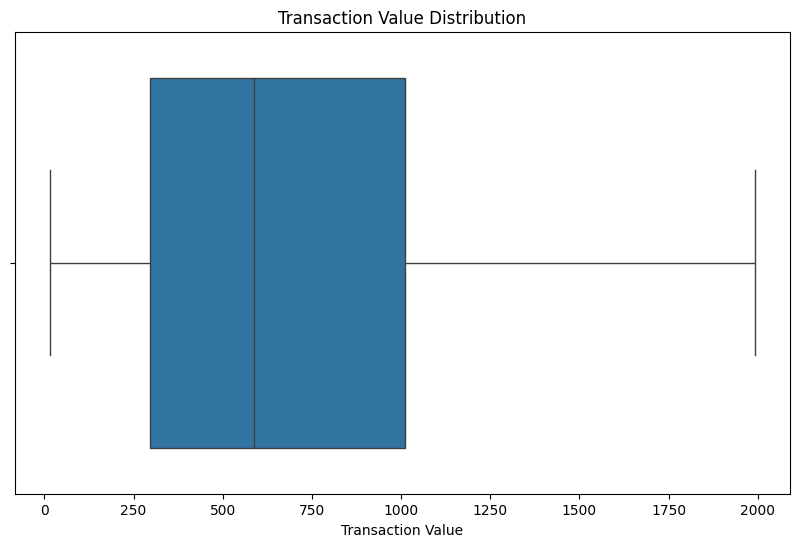

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=transactions, x='TotalValue')
plt.title('Transaction Value Distribution')
plt.xlabel('Transaction Value')
plt.show()

YEARLY ANALYSIS OF PRODUCT PRICES

In [36]:
merged_data['Year'] = merged_data['TransactionDate'].dt.year

# Group by Year and ProductName to calculate price statistics
yearly_price_stats = merged_data.groupby(['Year', 'ProductName'])['Price_x'].agg(['mean', 'min', 'max', 'median','sum']).reset_index()

print("Yearly Price Analysis:")
print(yearly_price_stats.head())

Yearly Price Analysis:
   Year            ProductName    mean     min     max  median      sum
0  2023      ActiveWear Jacket  396.34  396.34  396.34  396.34   396.34
1  2023  ActiveWear Smartphone  239.70  239.70  239.70  239.70   239.70
2  2023  ActiveWear Smartwatch  455.72  455.72  455.72  455.72   455.72
3  2023    HomeSense Desk Lamp  156.96  156.96  156.96  156.96   156.96
4  2024   ActiveWear Biography  169.30  169.30  169.30  169.30  1354.40


YEARLY ANALYSIS OF CATEGORY LEVEL PRICE

In [40]:
# Group by Year and ProductName to calculate price statistics
yearly_price_stats_1 = merged_data.groupby(['Year', 'Category'])['Price_x'].agg(['mean', 'min', 'max', 'median','sum']).reset_index()

print("Yearly Price Analysis:")
print(yearly_price_stats_1.head())

Yearly Price Analysis:
   Year     Category        mean     min     max  median       sum
0  2023     Clothing  396.340000  396.34  396.34  396.34    396.34
1  2023  Electronics  347.710000  239.70  455.72  347.71    695.42
2  2023   Home Decor  156.960000  156.96  156.96  156.96    156.96
3  2024        Books  280.526222   33.59  497.76  337.22  75742.08
4  2024     Clothing  282.605419   18.82  481.78  303.50  64151.43
